# Case Study on ANOVA

XYZ Company has offices in four different zones. The company wishes to
investigate the following :
- The mean sales generated by each zone.
- Total sales generated by all the zones for each month.
- Check whether all the zones generate the same amount of sales.

Help the company to carry out their study with the help of data provided.

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#importing data into python environment
df = pd.read_csv('Sales_data_zone_wise.csv')
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [33]:
#checking for null values
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

There are no null values in the data set

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


## 1. The mean sales generated by each zone

In [35]:
df.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [36]:
df.agg([np.mean])
round(df.agg([np.mean]),3)

,Zone - A,Zone - B,Zone - C,Zone - D
mean,1540493.138,1755559.586,1772871.034,1842926.759


## 2. Total sales generated by all the zones for each month.

In [38]:
df['Total Sales']=df.sum(axis=1)
df

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total Sales
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [24]:
df['Total Sales'].describe()

count    2.900000e+01
mean     6.911851e+06
std      5.908919e+05
min      5.925424e+06
25%      6.506659e+06
50%      7.032783e+06
75%      7.155515e+06
max      8.174449e+06
Name: Total Sales, dtype: float64

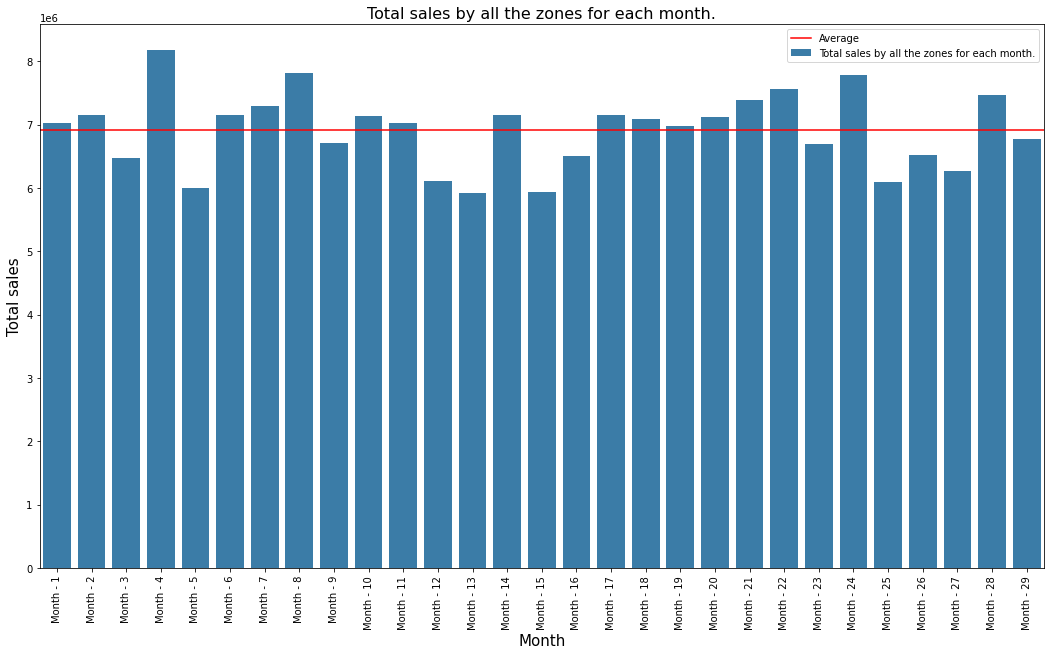

In [23]:
## graphical form of the total sales
## Also an average line is added to the graph
# creating subplots
ax = plt.subplots(figsize=(18,10))

# plotting columns
ax = sns.barplot(x ='Month',y ='Total Sales',label='Total sales by all the zones for each month.',data = df,color='#2980B9')
ax.axhline(df['Total Sales'].mean(),label='Average',color='r')
plt.title("Total sales by all the zones for each month.",fontsize=16)  
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
ax.legend()
plt.xlabel("Month",fontsize=15)
plt.ylabel("Total sales",fontsize=15)
plt.xticks(rotation=90)
plt.show()


**Findings:**

- Highest sale was recorded in Month-4 (8174449).
- Almost seven months has a sale greater than 7200000.
- Mean total sales per month is 6506659
- Minimum sales is 5925424 in month-13.




## 3. Check whether all the zones generate the same amount of sales.

Testing Using ANOVA

H0: Mean sales of all the four zones are equal.

H1: Mean sales of alteast one zone is significantly different

In [12]:
from scipy.stats import f_oneway
f_oneway(df['Zone - A'],df['Zone - B'],df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

**Another method using STATSMODELS**

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [14]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
df_melt

,index,variable,value
0,0,Zone - A,1483525
1,1,Zone - A,1238428
2,2,Zone - A,1860771
3,3,Zone - A,1871571
4,4,Zone - A,1244922
...,...,...,...
111,24,Zone - D,1695122
112,25,Zone - D,1520406
113,26,Zone - D,1289160
114,27,Zone - D,2178267


In [15]:
model = ols('value ~ C(variable)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(variable),1.483058e+12,3.0,5.672056,0.001183
Residual,9.761449e+12,112.0,NaN,NaN


**From ANOVA test, p value is 0.001 which is very much less than 0.05. which implies we reject the null hypothesis.**

**We infer that sales among the Zones differ significantly. i.e; Sales generated in each zones are different**

In [37]:
#submitted by Shiffa SaLeem